In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def vis_classification(dataframe, no_features, first_feature, last_feature, line, location_line, subset, label_line):
    fig, axes = plt.subplots(subset, 1, figsize=(10,6), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature,last_feature):
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+3*no_features].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["green"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["green","red"]
            
        # Predicted sensor values
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature], 
                     color="black",
                     label="$\hat{y}$",
                     linewidth=.6)
        
        # Target sensor values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature],
                        hue=columns[i+3*no_features], 
                        palette=palette,
                        s=6,
                        linewidth=.1)
        if line:
            ax[i-first_feature].axvline(location_line, 0,2, color="b", linestyle ="--", linewidth=1.5, label=label_line)
            
        # Set labels etc. 
        ax[i-1].legend(loc='center left', 
                       bbox_to_anchor=(1, 0.5),
                       fancybox=True, 
                       shadow=True, 
                       ncol=1,
                       prop={'size': 8})
        ax[i-1].set_xlabel("time [in s]")
        ax[i-1].set_ylabel("")
        ax[i-1].set_title("Sensor No.{}".format(i))

In [2]:
def vis_reconstruction_error(dataframe, no_features, first_feature, last_feature, thresholds_mean, thresholds_max, subset):
    fig, axes = plt.subplots(subset, 1, figsize=(10,6), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.scatterplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+2*no_features],
                     ax=ax[i-first_feature],
                     color="black",
                     linewidth=0.2,
                     s = 15,
                     label="Euclidean Distance \n between $y$ and $\hat{y}$")
        
        ax[i-first_feature].axhline(thresholds_mean[i-first_feature], 
                                    color="red", 
                                    linestyle ="-", 
                                    linewidth=2,
                                    label="threshold mean + 60%")
        
        ax[i-first_feature].axhline(thresholds_max[i-first_feature], 
                            color="blue", 
                            linestyle ="-", 
                            linewidth=2,
                            label="threshold max - 40%")
        
        # Set labels etc. 
        ax[i-1].legend(loc='center left', 
                       bbox_to_anchor=(1, 0.5),
                       fancybox=True, 
                       shadow=True, 
                       ncol=1,
                       prop={'size': 8})
        ax[i-1].set_xlabel("time [in s]")
        ax[i-1].set_ylabel("reconstruction error")
        ax[i-1].set_title("Sensor No.{}".format(i))
        ax[i-first_feature].set_xlim(0, 10000)     

## Predicted Data

In [3]:
artifical_data = pd.read_csv("../../files/classification/MSE/cpps_mean_plus_80percent.csv", sep=";")
training_set = artifical_data.iloc[:10000,:]

## Reconstruction Error during Training

In [4]:
thresholds_training_mean = [0.24372421389777016, 0.24761591192911026, 0.32903928384871034, 0.18159441767379658, 
                            0.27133063146032477, 0.23155811781422755, 0.149805263381253, 0.31187742832928145, 
                            0.0716386888894709, 0.2080102174959789]
thresholds_training_max = [4.584717, 2.540207, 3.790999054908752, 3.4866878986358643, 4.062194585800172, 
                           3.656018495559693, 3.338533520698548, 3.4780687093734737, 3.3930306434631348, 2.8501847982406616]

In [5]:
mean = [i*1.6 for i in thresholds_training_mean]
max_r = [i*0.6 for i in thresholds_training_max]

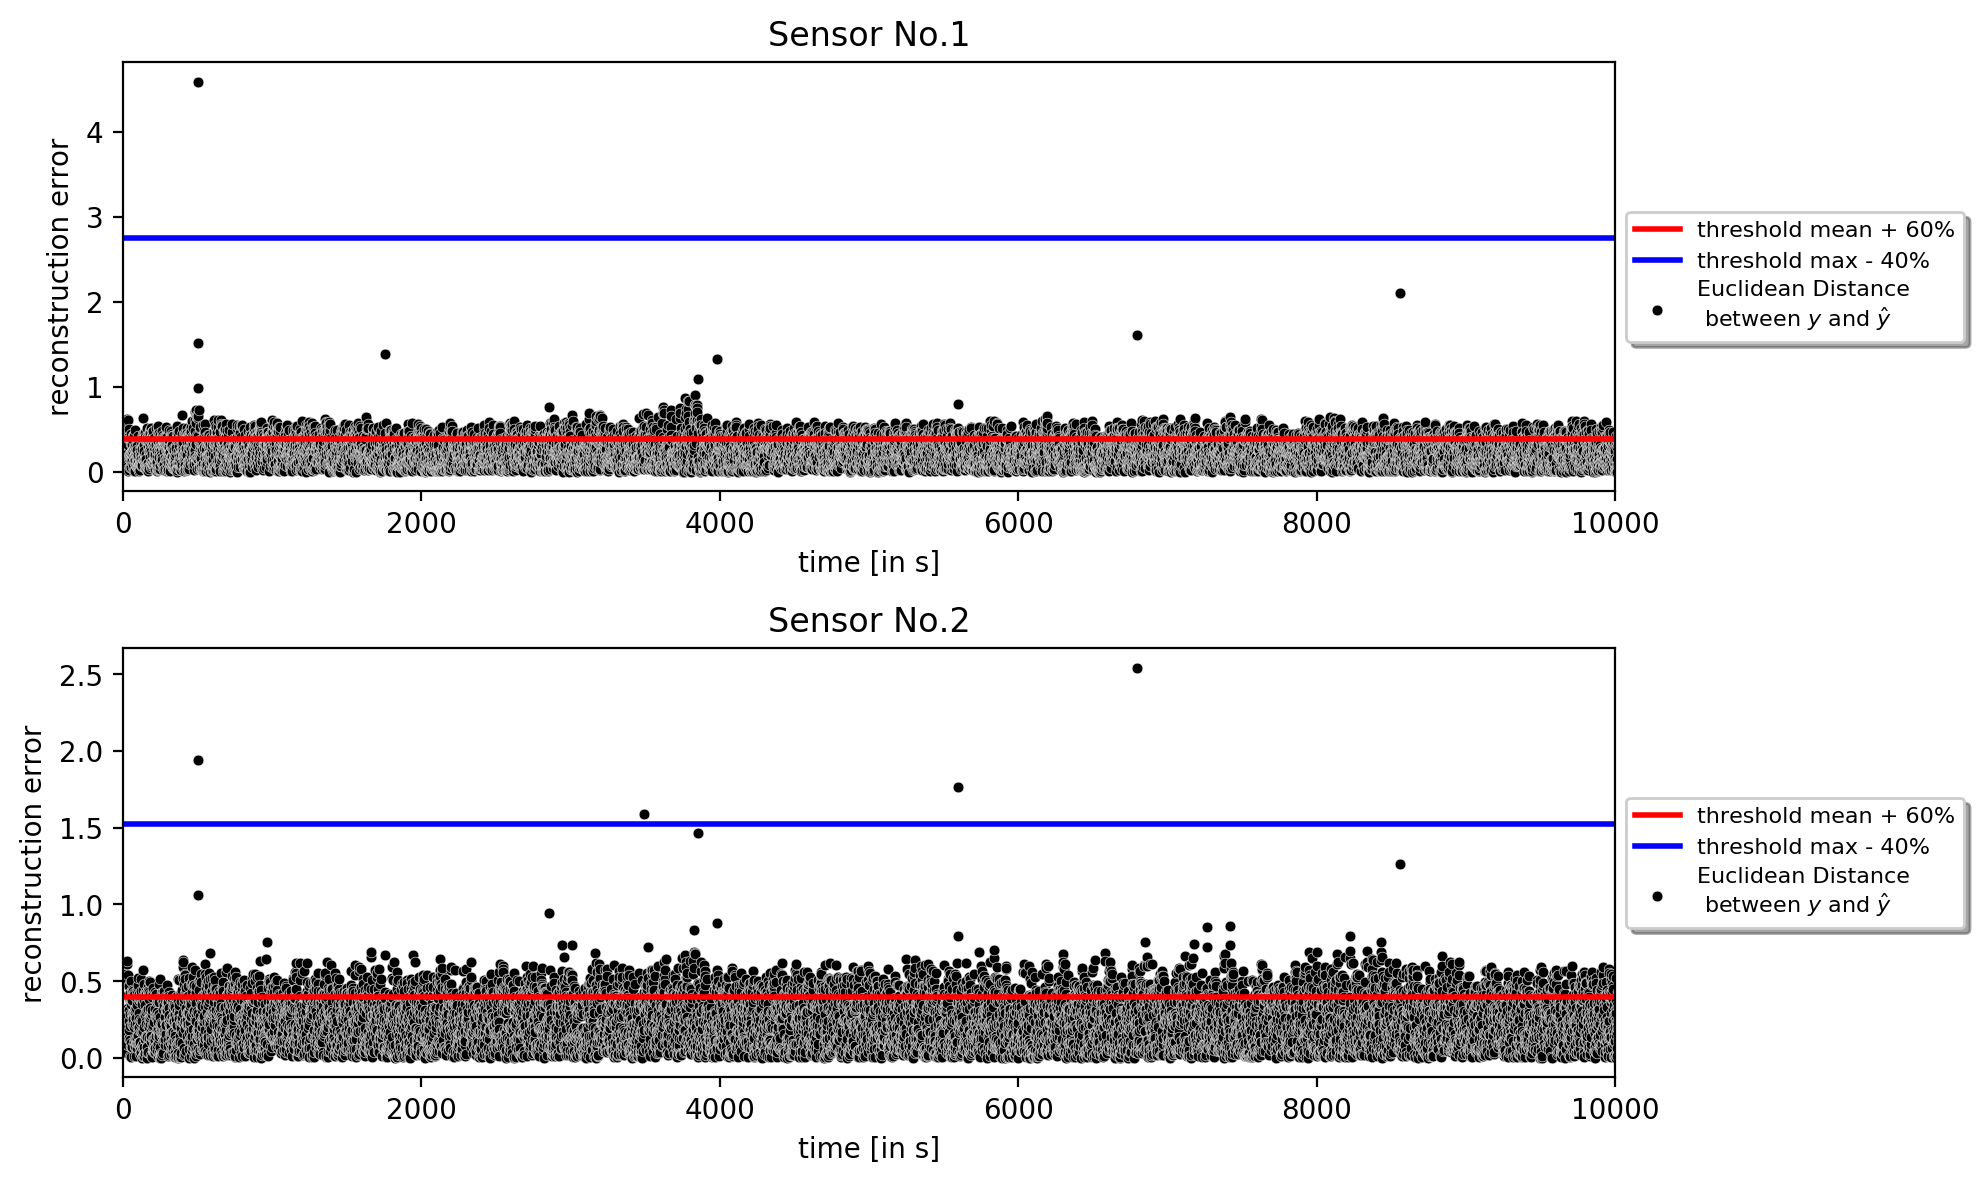

In [6]:
vis_reconstruction_error(dataframe=training_set, 
                         no_features=10, 
                         first_feature=1, 
                         last_feature=3, 
                         thresholds_mean=mean,
                         thresholds_max= max_r,
                         subset=2)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/re_cpps.png")
plt.show()

## Change of Degeneration Level

In [28]:
start_phase_1 = 22475
start_phase_2 = 36415

# Visualisation of Classification
## Phase 0 - no error

In [29]:
artifical_data = pd.read_csv("../../files/classification/MSE/cpps_mean_plus_60percent.csv", sep=";")
artifical_data = artifical_data.iloc[0:800,:]

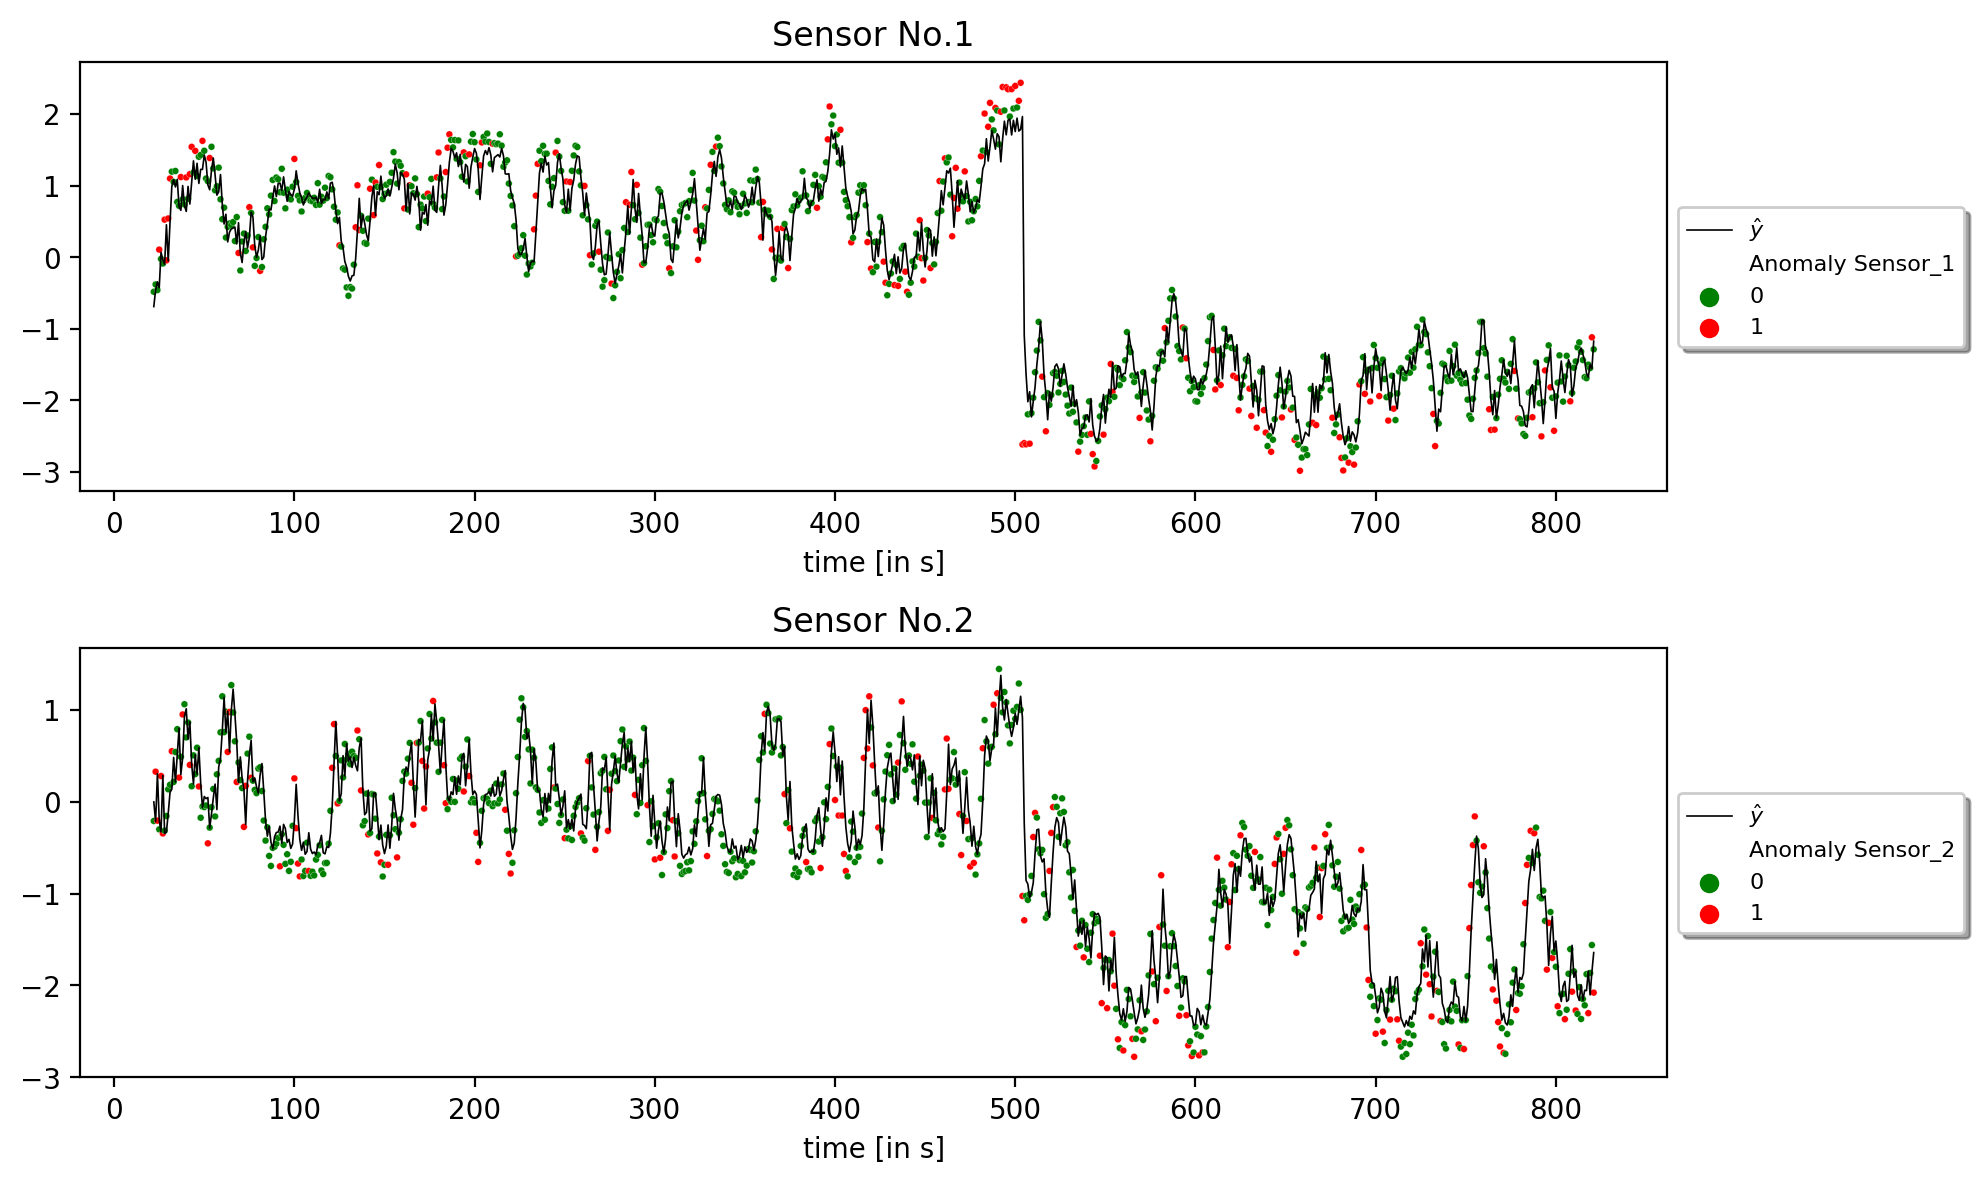

In [30]:
vis_classification(dataframe = artifical_data,
                   no_features=10, 
                   first_feature=1, 
                   last_feature=3,
                   line = False,
                   location_line = start_phase_1,
                   subset = 2,
                   label_line="")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_p0_cpps.png")
plt.show()

## Transistion from Phase 0 to Phase 1

In [31]:
artifical_data = pd.read_csv("../../files/classification/MSE/cpps_mean_plus_60percent.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_1-200:23500,:]

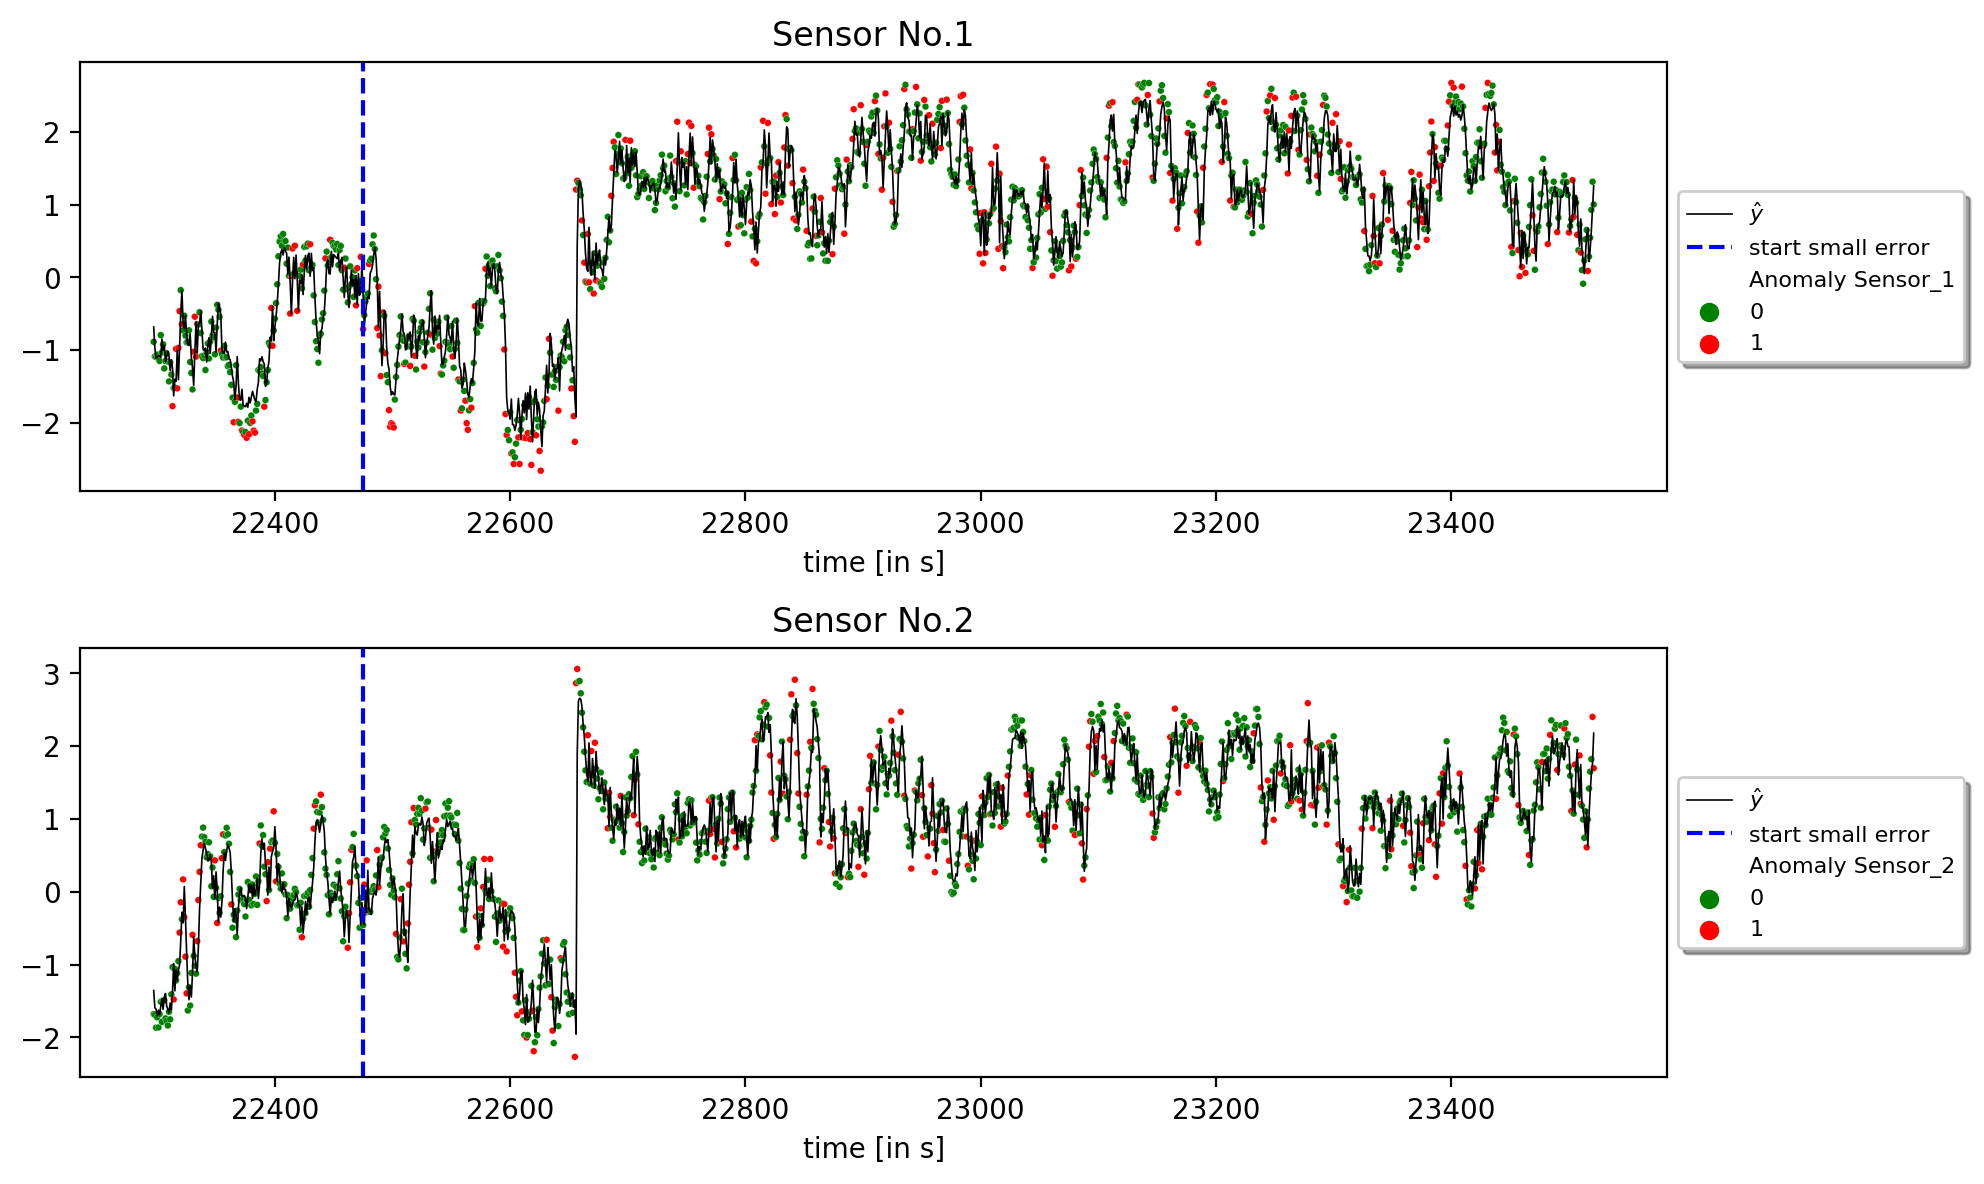

In [32]:
vis_classification(dataframe = artifical_data,
               no_features=10, 
               first_feature=1, 
               last_feature=3,
               line = True,
               location_line = start_phase_1,
               subset = 2,
               label_line="start small error")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_start1_cpps.png")
plt.show()

## Transistion from Phase 1 to Phase 2

In [33]:
artifical_data = pd.read_csv("../../files/classification/MSE/cpps_mean_plus_60percent.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_2-400:37250,:]

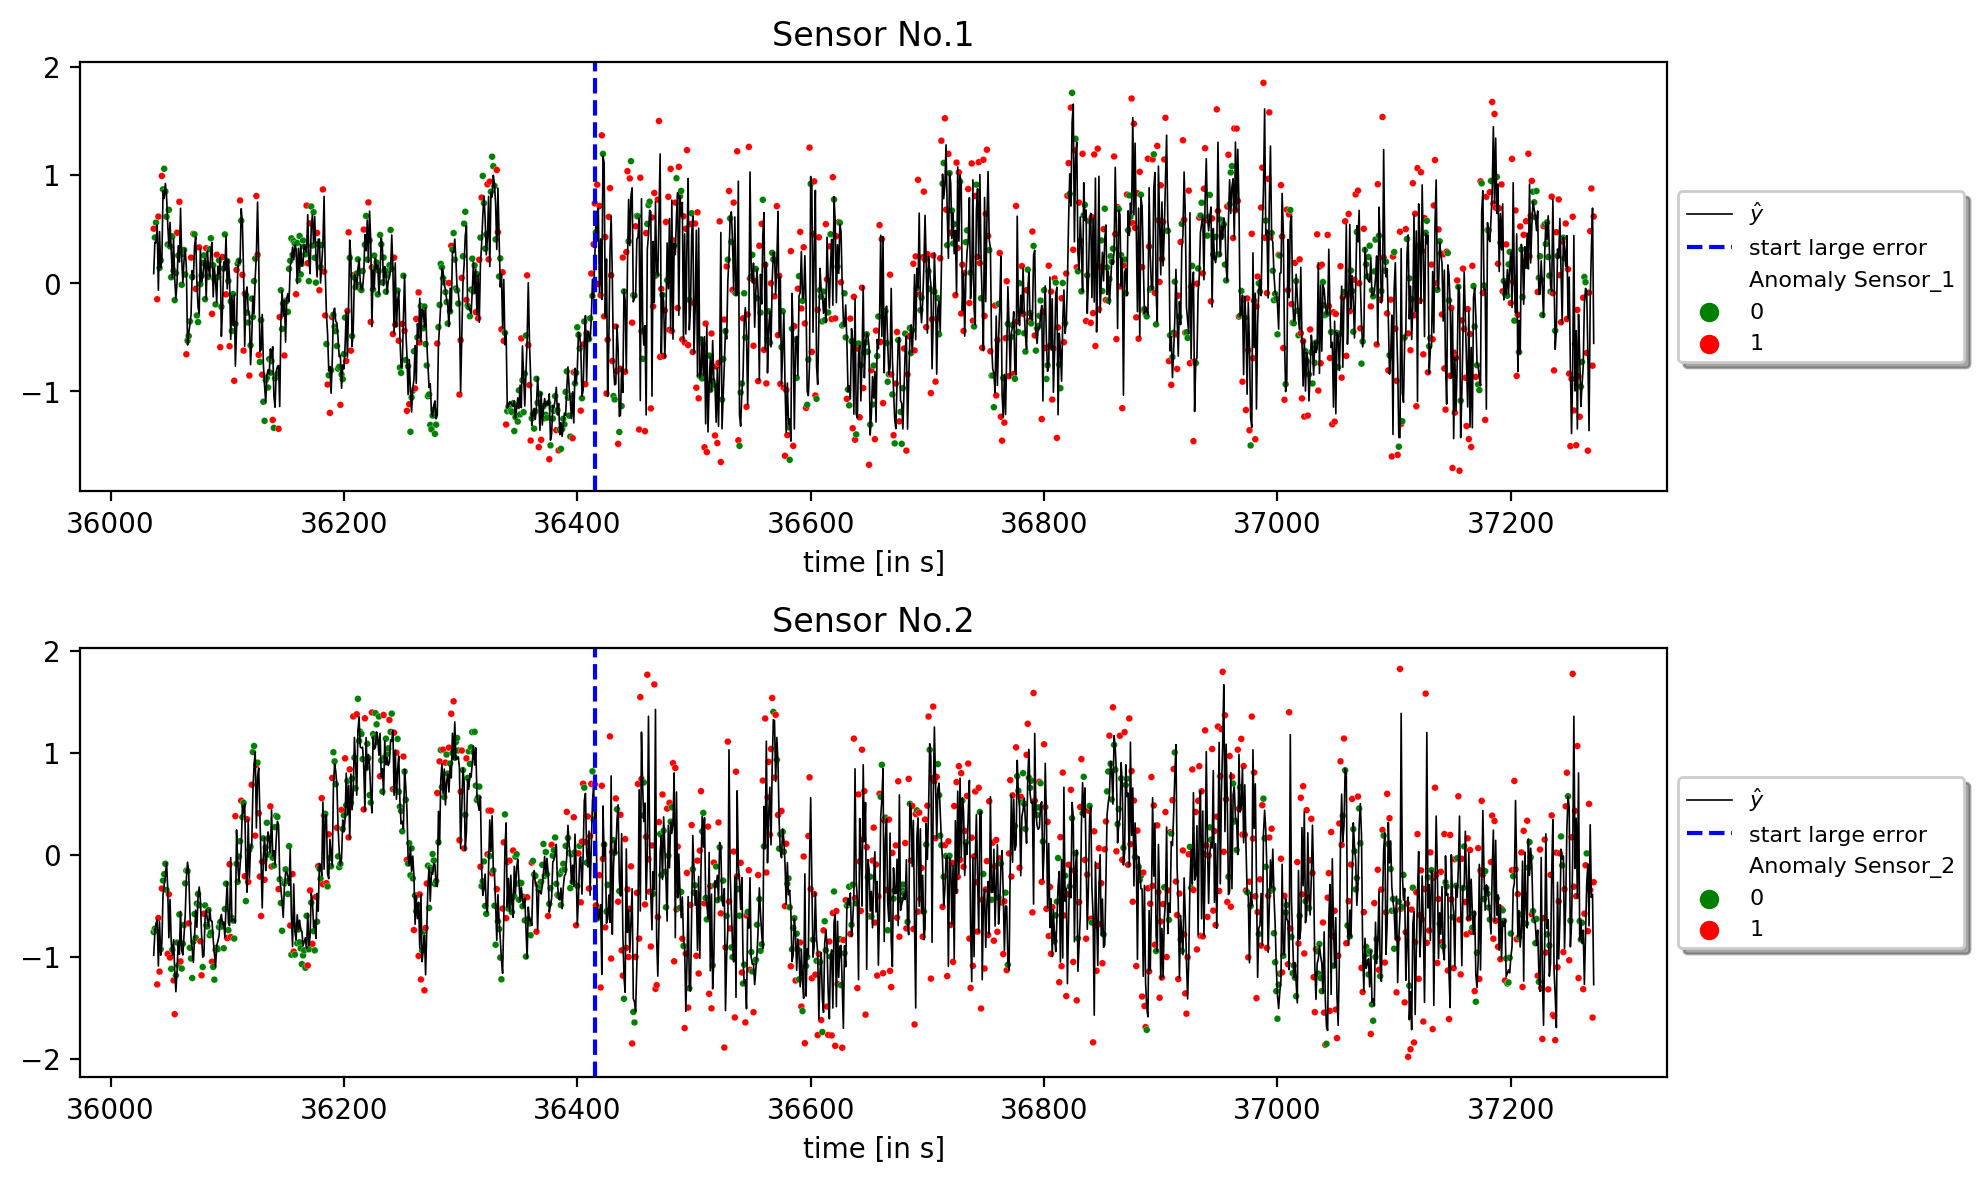

In [34]:
vis_classification(dataframe = artifical_data,
               no_features=10, 
               first_feature=1, 
               last_feature=3,
               line = True,
               location_line = start_phase_2,
               subset = 2,
               label_line="start large error")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_start2_cpps.png")
plt.show()